# Classify the Players
#### Apply K-means algorithm to coefficients from players' model to classify the players

In [103]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

Read the coefficients of trained models

In [104]:
df = pd.read_csv('Players_Model.csv')
df.head()

,PLAYER_ID,PLAYER_NAME,PERIOD,REMAIN_TIME,DIST,ANGLE,COMBINED_SHOT_TYPE_Jump Shot,COMBINED_SHOT_TYPE_Layup,COMBINED_SHOT_TYPE_Dunk,COMBINED_SHOT_TYPE_Tip Shot,COMBINED_SHOT_TYPE_Hook Shot,COMBINED_SHOT_TYPE_Bank Shot,INTERCEPT
0,101108,Chris Paul,-0.051964,0.121902,-0.192807,0.046609,-0.008263,0.052239,0.000000,0.0,0.000000,-0.210200,-0.236374
1,1626145,Tyus Jones,-0.074666,0.123918,-0.208353,0.032944,-0.351828,-0.319104,0.000000,0.0,0.138044,-0.024841,-0.244680
2,1626156,D'Angelo Russell,-0.030072,0.120477,-0.056453,-0.041031,-0.109492,0.047514,0.305335,0.0,-0.282369,-0.237486,-0.325174
3,1626157,Karl-Anthony Towns,-0.108044,-0.024060,-0.250905,-0.027642,-0.121184,-0.111596,0.820490,0.0,-0.771974,-0.023453,-0.225615
4,1626162,Kelly Oubre Jr.,-0.010753,-0.060752,-0.285859,-0.115300,-0.152986,-0.176689,0.752915,0.0,-0.686414,0.017454,-0.544491


Give more weight to feature "DIST", and less weight to "COMBINED_SHOT_TYPE_Dunk"

In [105]:
df['DIST'] = df['DIST'] * 2.0
df['COMBINED_SHOT_TYPE_Dunk'] = df['COMBINED_SHOT_TYPE_Dunk'] / 3.0
df.head()

,PLAYER_ID,PLAYER_NAME,PERIOD,REMAIN_TIME,DIST,ANGLE,COMBINED_SHOT_TYPE_Jump Shot,COMBINED_SHOT_TYPE_Layup,COMBINED_SHOT_TYPE_Dunk,COMBINED_SHOT_TYPE_Tip Shot,COMBINED_SHOT_TYPE_Hook Shot,COMBINED_SHOT_TYPE_Bank Shot,INTERCEPT
0,101108,Chris Paul,-0.051964,0.121902,-0.385613,0.046609,-0.008263,0.052239,0.000000,0.0,0.000000,-0.210200,-0.236374
1,1626145,Tyus Jones,-0.074666,0.123918,-0.416705,0.032944,-0.351828,-0.319104,0.000000,0.0,0.138044,-0.024841,-0.244680
2,1626156,D'Angelo Russell,-0.030072,0.120477,-0.112906,-0.041031,-0.109492,0.047514,0.101778,0.0,-0.282369,-0.237486,-0.325174
3,1626157,Karl-Anthony Towns,-0.108044,-0.024060,-0.501810,-0.027642,-0.121184,-0.111596,0.273497,0.0,-0.771974,-0.023453,-0.225615
4,1626162,Kelly Oubre Jr.,-0.010753,-0.060752,-0.571718,-0.115300,-0.152986,-0.176689,0.250972,0.0,-0.686414,0.017454,-0.544491


Classify the players with K-Means

In [106]:
X = df.drop(['PLAYER_ID', 'PLAYER_NAME', 'INTERCEPT'], axis=1)
clf = KMeans(n_clusters=5, random_state=42)
clf.fit(X)
print(clf.cluster_centers_)

[[-1.25216652e-02  2.74032984e-02 -3.48320220e-01  2.02871772e-03
  -1.89530801e-01 -1.14882570e-01  3.91515152e-01 -4.57570177e-02
  -1.06552514e+00 -2.34160690e-02]
 [-1.56532727e-02  3.57990809e-03 -6.66959047e-01  1.33930227e-02
  -1.36738470e-01 -1.28561681e-01  2.50828711e-01 -1.38777878e-17
  -6.97617459e-01 -1.67748821e-02]
 [-2.80853308e-02  2.85015151e-02 -3.05551190e-01 -1.09535810e-03
  -2.85088315e-01 -2.10493003e-01  1.18901816e-01 -6.93889390e-18
  -2.52435532e-01 -7.06738246e-02]
 [-4.82084945e-02 -2.51130889e-03 -2.04183628e+00  3.05799188e-02
  -9.76923131e-02 -1.95647948e-01  3.40345167e-01  3.46944695e-18
  -9.63380877e-01  4.79315796e-02]
 [-1.41260264e-02  2.62458828e-02 -3.97987259e-01  2.61327743e-03
   9.47110264e-02  1.39670965e-01  8.01227889e-03  1.04083409e-17
  -7.40800581e-02  5.45267727e-02]]


In [107]:
player_cluster = df.copy()
player_cluster['CLUSTER'] = clf.labels_

In [108]:
player_cluster.head()

,PLAYER_ID,PLAYER_NAME,PERIOD,REMAIN_TIME,DIST,ANGLE,COMBINED_SHOT_TYPE_Jump Shot,COMBINED_SHOT_TYPE_Layup,COMBINED_SHOT_TYPE_Dunk,COMBINED_SHOT_TYPE_Tip Shot,COMBINED_SHOT_TYPE_Hook Shot,COMBINED_SHOT_TYPE_Bank Shot,INTERCEPT,CLUSTER
0,101108,Chris Paul,-0.051964,0.121902,-0.385613,0.046609,-0.008263,0.052239,0.000000,0.0,0.000000,-0.210200,-0.236374,4
1,1626145,Tyus Jones,-0.074666,0.123918,-0.416705,0.032944,-0.351828,-0.319104,0.000000,0.0,0.138044,-0.024841,-0.244680,2
2,1626156,D'Angelo Russell,-0.030072,0.120477,-0.112906,-0.041031,-0.109492,0.047514,0.101778,0.0,-0.282369,-0.237486,-0.325174,2
3,1626157,Karl-Anthony Towns,-0.108044,-0.024060,-0.501810,-0.027642,-0.121184,-0.111596,0.273497,0.0,-0.771974,-0.023453,-0.225615,1
4,1626162,Kelly Oubre Jr.,-0.010753,-0.060752,-0.571718,-0.115300,-0.152986,-0.176689,0.250972,0.0,-0.686414,0.017454,-0.544491,1


In [109]:
player_cluster.to_csv('Players_Cluster.csv', index=False)

View the cluster with location features

In [110]:
X_loc = df[['DIST', 'ANGLE']]
clf_loc = KMeans(n_clusters=3,random_state=42)
clf_loc.fit(X_loc)
print(clf_loc.cluster_centers_)

[[-0.27088644  0.00554966]
 [-2.04183628  0.03057992]
 [-0.65983055  0.00352731]]


In [111]:
player_cluster_loc = df.copy()[['PLAYER_ID', 'PLAYER_NAME', 'DIST', 'ANGLE']]
player_cluster_loc['CLUSTER'] = clf.labels_
player_cluster_loc.head()

,PLAYER_ID,PLAYER_NAME,DIST,ANGLE,CLUSTER
0,101108,Chris Paul,-0.385613,0.046609,4
1,1626145,Tyus Jones,-0.416705,0.032944,2
2,1626156,D'Angelo Russell,-0.112906,-0.041031,2
3,1626157,Karl-Anthony Towns,-0.501810,-0.027642,1
4,1626162,Kelly Oubre Jr.,-0.571718,-0.115300,1


In [112]:
player_cluster_loc.to_csv('Players_Cluster_loc.csv', index=False)

The average silhouette_score is: 0.47585231046479043


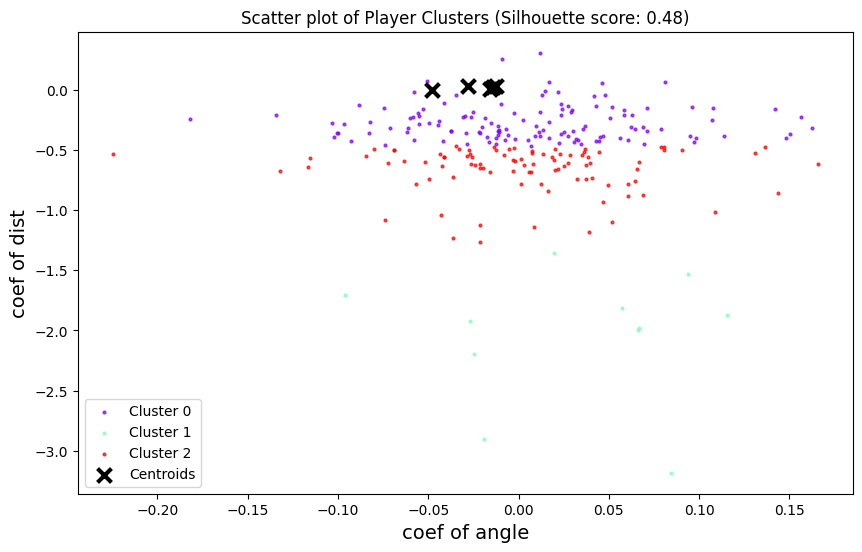

In [114]:
# Calculate silhouette score
cluster_labels = clf_loc.fit_predict(X_loc)
silhouette_avg = silhouette_score(X_loc, cluster_labels)
print(f"The average silhouette_score is: {silhouette_avg}")


plt.figure(figsize=(10, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(cluster_labels))))

for i, label in enumerate(np.unique(cluster_labels)):
    plt.scatter(X_loc.loc[cluster_labels == label, 'ANGLE'], 
                X_loc.loc[cluster_labels == label, 'DIST'], 
                color=colors[i], 
                label=f'Cluster {label}',
                s=4, 
                alpha=0.7)

# Plot centroids
centroids = clf.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, linewidths=3,
            color='black', zorder=10, label='Centroids')

plt.xlabel('coef of angle', fontsize=14)
plt.ylabel('coef of dist', fontsize=14)
plt.legend(loc='best')
plt.title(f'Scatter plot of Player Clusters (Silhouette score: {silhouette_avg:.2f})')
plt.show()
